# Optimization

## Final Project

### Team Wins Regression

In [84]:
using CSV
adv_stats = CSV.read("NBA_AdvStats.csv")
teams = CSV.read("Teams.csv")

,Rk,Team,Tm,Overall,Wins,Losses
,Int64,String,String,String,Int64,Int64
1,1,Milwaukee Bucks,MIL,60-22,60,22
2,2,Toronto Raptors,TOR,58-24,58,24
3,3,Golden State Warriors,GSW,57-25,57,25
4,4,Denver Nuggets,DEN,54-28,54,28
5,5,Houston Rockets,HOU,53-29,53,29
6,6,Portland Trail Blazers,POR,53-29,53,29
7,7,Philadelphia 76ers,PHI,51-31,51,31
8,8,Utah Jazz,UTA,50-32,50,32
9,9,Boston Celtics,BOS,49-33,49,33


In [88]:
# create new aggregate columns
teams[:, :TotMP] .= 0.0
teams[:, :TotWS] .= 0.0
teams[:, :TotAdjBPM] .= 0.0

30-element view(::Array{Float64,1}, :) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [83]:
eltype.(eachcol(teams))

9-element Array{DataType,1}:
 Int64  
 String 
 String 
 String 
 Int64  
 Int64  
 Float64
 Float64
 Float64

In [89]:
# loop through players adding each's stats to his teams' totals
for i in 1:nrow(adv_stats)
    if adv_stats[i, :Tm] != "TOT"
        newMP = teams[in.(teams.Tm, Ref([adv_stats[i, :Tm]])), :TotMP] .+ adv_stats[i, :MP]
        teams[in.(teams.Tm, Ref([adv_stats[i, :Tm]])), :TotMP] .= Ref(newMP[1])
        newWS = teams[in.(teams.Tm, Ref([adv_stats[i, :Tm]])), :TotWS] .+ adv_stats[i, :WS]
        teams[in.(teams.Tm, Ref([adv_stats[i, :Tm]])), :TotWS] .= Ref(newWS[1])
        newBPM = teams[in.(teams.Tm, Ref([adv_stats[i, :Tm]])), :TotAdjBPM] .+ (adv_stats[i, :MP] .* adv_stats[i, :BPM])
        teams[in.(teams.Tm, Ref([adv_stats[i, :Tm]])), :TotAdjBPM] .= Ref(newBPM[1])
    end
end

In [90]:
teams

,Rk,Team,Tm,Overall,Wins,Losses,TotMP,TotWS
,Int64,String,String,String,Int64,Int64,Float64,Float64
1,1,Milwaukee Bucks,MIL,60-22,60,22,19779.0,62.5
2,2,Toronto Raptors,TOR,58-24,58,24,19878.0,56.2
3,3,Golden State Warriors,GSW,57-25,57,25,19805.0,56.8
4,4,Denver Nuggets,DEN,54-28,54,28,19731.0,50.6
5,5,Houston Rockets,HOU,53-29,53,29,19833.0,53.3
6,6,Portland Trail Blazers,POR,53-29,53,29,19857.0,51.7
7,7,Philadelphia 76ers,PHI,51-31,51,31,19804.0,48.8
8,8,Utah Jazz,UTA,50-32,50,32,19755.0,53.7
9,9,Boston Celtics,BOS,49-33,49,33,19782.0,52.1


In [91]:
# divide Total Adjusted BPM by the Total Minutes to see weighted adjusted average
teams[:, :TotAdjBPM] = teams[:, :TotAdjBPM] ./ teams[:, :TotMP]

30-element Array{Float64,1}:
  1.8398301228575762 
  1.2837307576214907 
  1.5315374905326942 
  1.0501647154224316 
  1.2015126304643777 
  1.1001812962683186 
  0.5313573015552412 
  1.2692432295621363 
  0.924466686887069  
  0.8433111715523319 
  0.678447094646029  
  0.25431669188098843
  0.44336278717495586
  ⋮                  
 -0.16626799108047832
 -0.31345735807087616
 -0.2416561601694487 
 -0.18222536777715995
 -0.5109551833408782 
 -0.25892387122899374
 -0.7914559502307846 
 -1.3912456555684278 
 -2.0193076768488747 
 -2.3626132739330727 
 -2.0442287381179907 
 -2.160507557757444  

In [92]:
using GLM, StatsModels
linearmodel_teamwins = fit(LinearModel, @formula(Wins ~ TotWS + TotAdjBPM), teams)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Wins ~ 1 + TotWS + TotAdjBPM

Coefficients:
────────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error   t value  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  4.54529    14.4371    0.314833    0.7553  -25.0773     34.1679 
TotWS        0.876818    0.346867  2.52782     0.0176    0.165106    1.58853
TotAdjBPM    1.53492     3.52615   0.435296    0.6668   -5.70014     8.76998
────────────────────────────────────────────────────────────────────────────

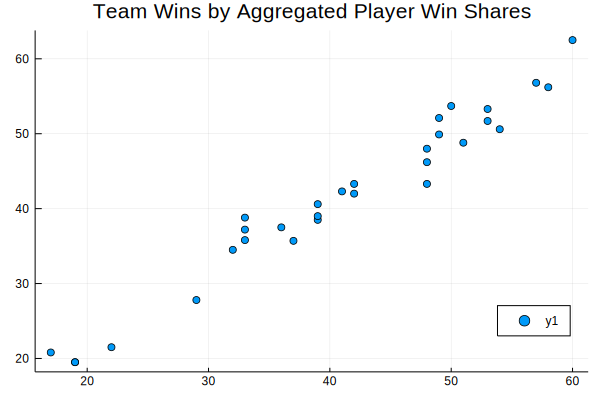

In [99]:
using Plots

scatter(teams[!, :Wins], teams[!, :TotWS], title="Team Wins by Aggregated Player Win Shares", legend=:bottomright)

In [100]:
savefig("TeamWinsvsWinShare.png")

In [96]:
linearmodel_teamwinsBPM = fit(LinearModel, @formula(Wins ~ TotAdjBPM), teams)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Wins ~ 1 + TotAdjBPM

Coefficients:
──────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error  t value  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   41.023     0.478211  85.7845    <1e-34   40.0435     42.0026
TotAdjBPM     10.3926    0.430191  24.1581    <1e-19    9.51139    11.2738
──────────────────────────────────────────────────────────────────────────

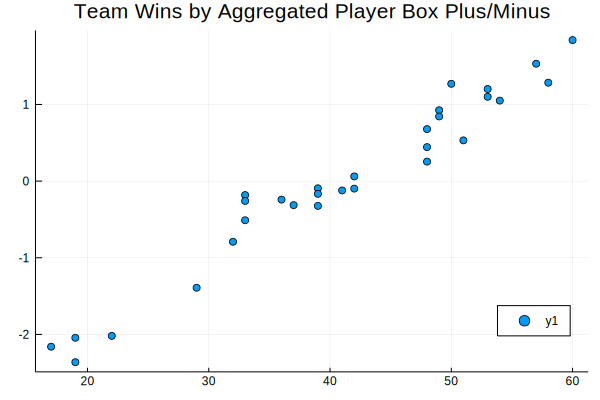

In [101]:
scatter(teams[!, :Wins], teams[!, :TotAdjBPM], title="Team Wins by Aggregated Player Box Plus/Minus", legend=:bottomright)

In [102]:
savefig("TeamWinsvsBPM.png")